In [72]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("universal_top_spotify_songs.csv")
df['artists'] = df['artists'].fillna('')
df['country'] = df['country'].fillna('Unknown')
df['artist_list'] = df['artists'].apply(lambda x: [artist.strip() for artist in x.split(',')])

country_codes = set(df['country'].dropna().unique())
df['artist_list'] = df['artist_list'].apply(lambda lst: [a for a in lst if a not in country_codes])

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

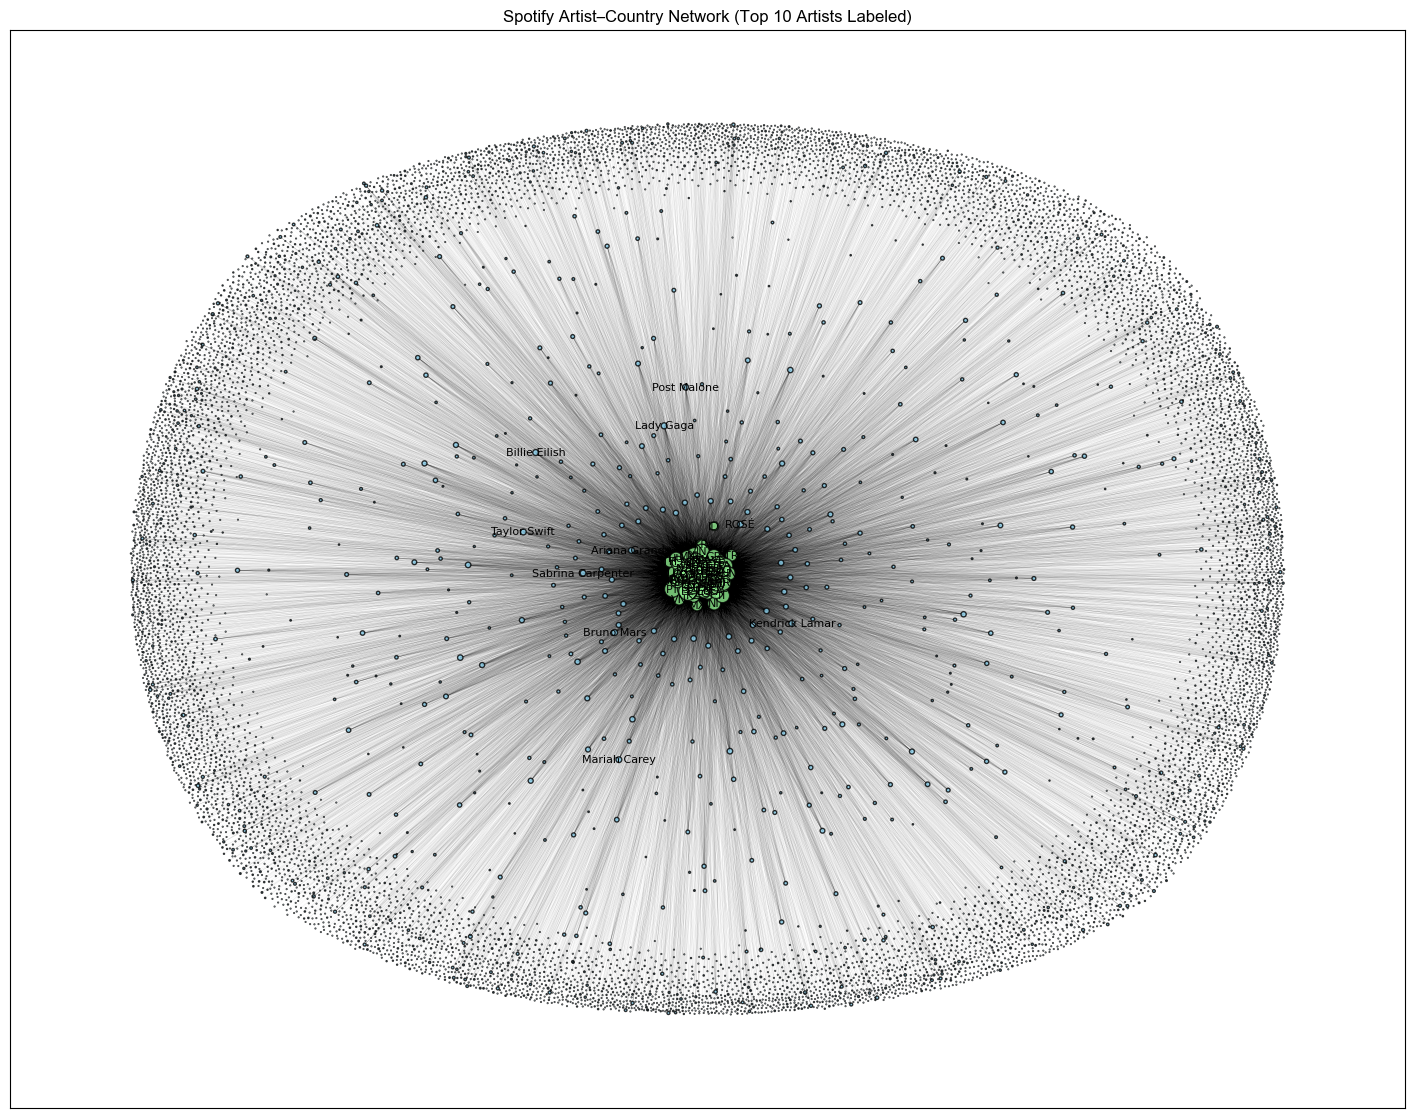

In [117]:
g = nx.Graph()
for _, row in df.iterrows():
    country = row['country']
    for artist in row['artist_list']:
        g.add_node(artist, type='artist')
        g.add_node(country, type='country')
        g.add_edge(artist, country)

degree_centrality = nx.degree_centrality(g)

node_sizes = [3000 * degree_centrality[n] for n in g.nodes]
node_colors = ['skyblue' if g.nodes[n]['type'] == 'artist' else 'lightgreen' for n in g.nodes]
pos = nx.spring_layout(g, k=0.4, seed=42)

top_10 = sorted([n for n in g.nodes if g.nodes[n]['type'] == 'artist'], key=lambda x: degree_centrality[x], reverse=True)[:10]

labels = {
    n: n.replace('$', '') for n in g.nodes
    if g.nodes[n]['type'] == 'country' or n in top_10
}

plt.figure(figsize=(18, 14))
nx.draw_networkx_nodes(g, pos, node_size=node_sizes, node_color=node_colors, edgecolors='black', alpha=0.8)
nx.draw_networkx_edges(g, pos, width=0.1, alpha=0.1)
nx.draw_networkx_labels(g, pos, font_size=8, labels=labels)
plt.title("Spotify Artist–Country Network (Top 10 Artists Labeled)")
plt.show()

In [126]:
top_3 = sorted([n for n in g.nodes if g.nodes[n]['type'] == 'artist'], key=lambda x: degree_centrality[x],reverse=True)[:3]

print("Top 3 Artists:")
for artist in top_3:
    print(f"{artist}: {degree_centrality[artist]:.4f}")

Top 3 Artists:
Bruno Mars: 0.0063
Lady Gaga: 0.0062
Kendrick Lamar: 0.0062


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

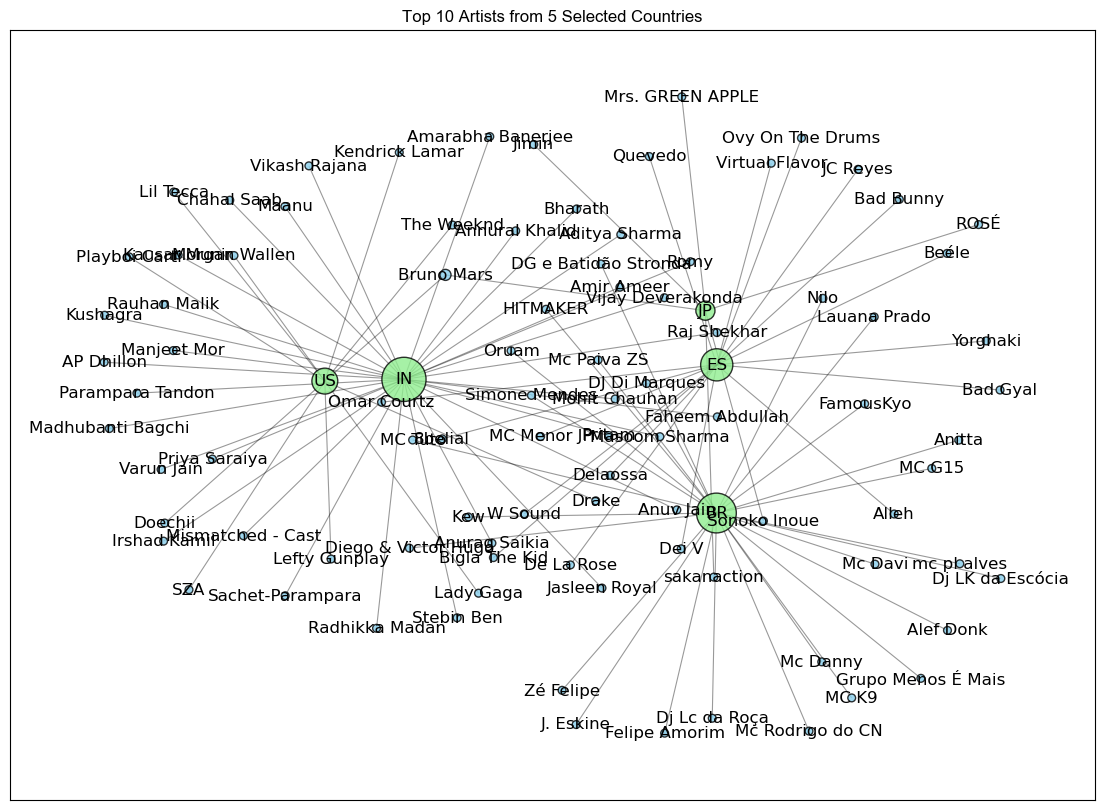

In [127]:
selected_countries = ['US', 'BR', 'JP', 'ES', 'IN']
filtered = df[df['country'].isin(selected_countries)]
top_10_df = filtered.groupby('country').head(10)

G = nx.Graph()
for _, row in top_10_df.iterrows():
    country = row['country']
    for artist in row['artist_list']:
        G.add_node(artist, type='artist')
        G.add_node(country, type='country')
        G.add_edge(artist, country)

degree_centrality_filtered = nx.degree_centrality(G)
node_sizes_filtered = [3000 * degree_centrality_filtered[n] for n in G.nodes]
node_colors_filtered = ['skyblue' if G.nodes[n]['type'] == 'artist' else 'lightgreen' for n in G.nodes]
pos_filtered = nx.spring_layout(G, k=0.5, seed=42)

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos_filtered, node_size=node_sizes_filtered, node_color=node_colors_filtered, edgecolors='black', alpha=0.8)
nx.draw_networkx_edges(G, pos_filtered, width=0.8, alpha=0.4)
nx.draw_networkx_labels(G, pos_filtered)
plt.title("Top 10 Artists from 5 Selected Countries")
plt.show()